In [1]:
import random
import matplotlib.pyplot as plt 
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as ss
import numpy as np
from itertools import permutations




Мат ожидание считается как сумма матожиданий показательных с.в с параметрами $ (Λ + (k-1)λ)$

Дисперсия так же

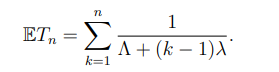

$Ð(T_n) = ∑\limits_{k=1}^n \frac{1}{(Λ+(k-1)λ)^2} $

In [2]:
l1_f = 1
l2_f = 10

expected = 0 
for k in range(1,6): 
        expected+= 1.0/(l2_f +(k-1)*l1_f)
print('Expected value: {0} '.format(expected))



variance = 0 
for k in range(1,6): 
        variance+= 1.0/(l2_f +(k-1)*l1_f)**2
print('Variance: {0} '.format(variance))


def light_res_sim(main = 1,reserved_alive = 4):
    time = 0
    is_working = 1
    while is_working:
        is_working=0
        time_lived = random.expovariate(l2_f)
        if reserved_alive >0: #simulate for every alive reserve
            for i in range(0,reserved_alive):  
              reserved_time = random.expovariate(l1_f) #sim its live in this period (i can do it by no aftereffect of exponential values)
              if reserved_time <= time_lived:
                  reserved_alive -= 1 # if its died in this period:)
        time += time_lived
        if reserved_alive>0:
          reserved_alive -= 1 #switch died element to alive
          is_working=1

    return time
        

Expected value: 0.42259407259407256 
Variance: 0.03622810783400194 


In [3]:
print('Time of work this time is {0}'.format(light_res_sim()))

Time of work this time is 0.5454055298960084


In [4]:
def lln(n,use = 0): #low of large numbers)
    sum = 0
    nums = []
    for i in range(1,n+1):
        sum+=light_res_sim()
        nums.append(sum/i)
    if use:
        return nums
    plt.plot(nums,'ro') 
    plt.axhline(y=expected, xmin=0.0, xmax=1)
    plt.show()

In [5]:
def average_error(len):
    k = 1000
    nums = []
    for i in range(1,len+1):
        sum = 0
        for j in range(1,k+1):
            sum+= abs(lln(i,1)[i-1]-expected)
        nums.append(sum/k)
    x = np.arange(0,len,0.5)
    plt.plot(nums)

    plt.plot(x,0.15/x**0.5)
    plt.legend(['погрешность','0.1.5/x^0.5'])
    plt.show()

<ipython-input-5-4924021a2377>:12: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x,0.15/x**0.5)


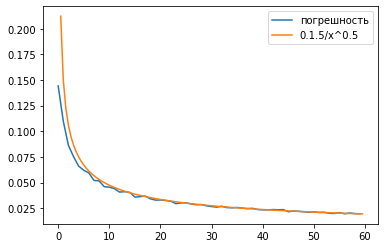

In [6]:
%matplotlib inline
average_error(60)

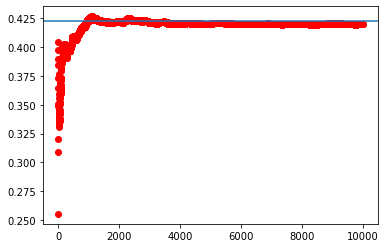

In [7]:
 lln(10000)
#light_res_sim()


In [8]:
def find_dist_normal (values, bins, pdf,step): #find absolute value of  substance between area under the hist and density of standart normal distribution
  len_bins = len(bins) -1 
  #Total_Area= sum(values[0:len_bins])/sum(values)
  dif = 0
  len_pdf = len(pdf)
  for i in range (0,len_bins,2):
    dif+=abs(sum(pdf[i:i+2])/sum(pdf)- sum(values[i:i+2])/sum(values))
  return dif




  

По этой теоремке

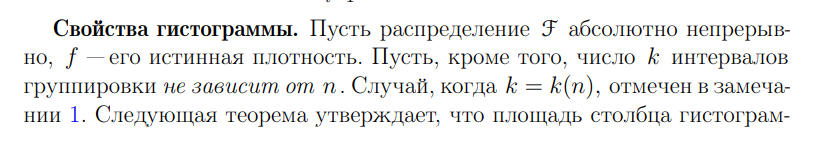 
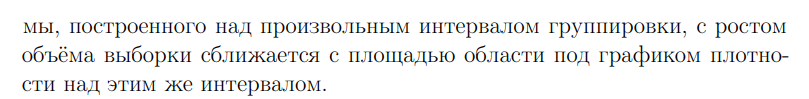

In [9]:


def draw_ecdf(arr, tr, x = None, real_ecdf=None):
    result_ecdf = ECDF(arr)(x)
    plt.plot(x, result_ecdf, color = "green")

    if tr:
      plt.plot(x, real_ecdf, color = "red")
      plt.legend(["Sample ecdf", "Real ecdf"])
    else:
      plt.legend(["Sample ecdf"])

    plt.show()



def draw_density(arr, tr=0,x=1, real_density = 1, number_bins = 100):
    values, bins, _  = plt.hist(arr, density=True, bins=number_bins, color = "green")
    len_bins= len(bins)-1
    step = (np.max(arr)-np.min(arr))/number_bins
    print('Substance between area under density curve and hist should goes to zero with bigger n. Now it is: {0}'.format(find_dist_normal(values, bins, real_density,step)))
    print('And of course Kolmogorov-smirnov test: {0}'.format (ss.kstest(arr, 'norm', args = (0,1))))
    if tr:
      plt.plot(x, real_density, color = "red")
      plt.legend(["Standart normal density", "Sample density"])
    else:
      plt.legend(["Sample density"])

    plt.show()


def clt(n):  #central limit theorem:)
  k=10000
  number_bins = 100
  num = []
  for i in range(0,k):
    sum=0
    for i in range(0,n):
      sum+=light_res_sim()
    num.append((sum-n*expected)/(n*variance)**0.5)
  step = (np.max(num)-np.min(num))/number_bins
  data = np.arange(np.min(num),np.max(num),step)
  pdf = ss.norm.pdf(x=data,loc = 0 , scale = 1 )
  cdf = ss.norm.cdf(x=data,loc = 0 , scale = 1)
  
  draw_density(num,1,x = data, real_density = pdf)
  draw_ecdf(num,1,x = data, real_ecdf = cdf )

  
    

Substance between area under density curve and hist should goes to zero with bigger n. Now it is: 0.05239131702627557
And of course Kolmogorov-smirnov test: KstestResult(statistic=0.005497923912468228, pvalue=0.9213558316465993)


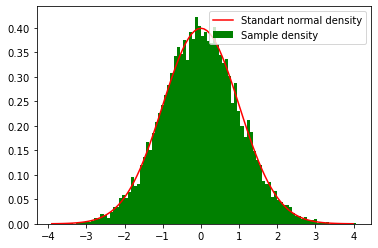

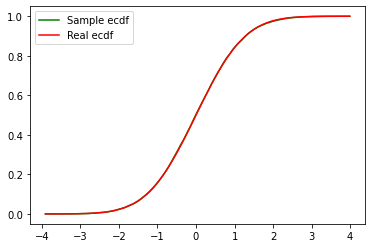

In [10]:
clt(200)


Substance between area under density curve and hist should goes to zero with bigger n. Now it is: 0.13057654445956757
And of course Kolmogorov-smirnov test: KstestResult(statistic=0.029464700562275403, pvalue=5.6284978027998764e-08)


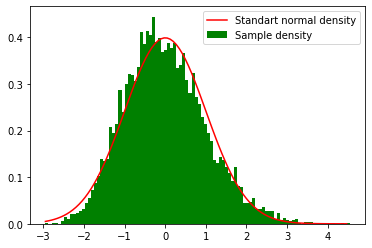

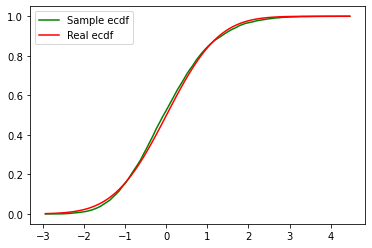

In [11]:
clt(5)



In [12]:
clt(1000)

KeyboardInterrupt: 

Substance between area under density curve and hist should goes to zero with bigger n. Now it is: 0.21809764348842706
And of course Kolmogorov-smirnov test: KstestResult(statistic=0.050349001631287194, pvalue=1.801311657206525e-22)


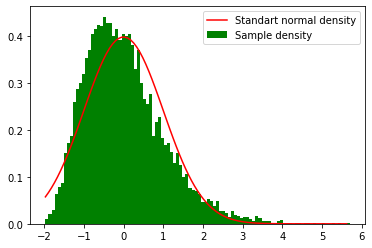

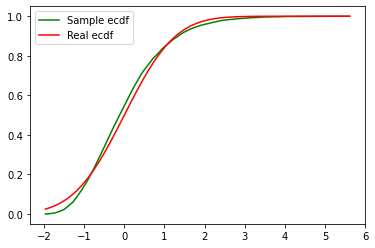

In [13]:
clt(1)

Substance between area under density curve and hist should goes to zero with bigger n. Now it is: 0.09828325565418031
And of course Kolmogorov-smirnov test: KstestResult(statistic=0.018257327566792436, pvalue=0.002513770516131628)


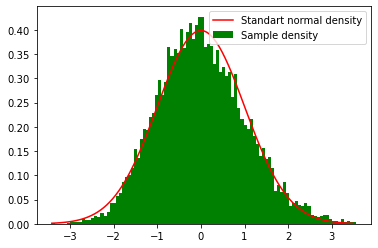

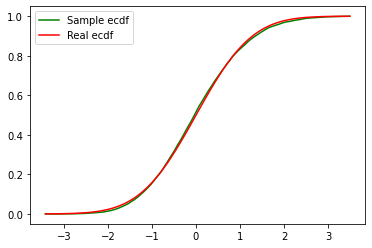

In [14]:
clt(10)

Substance between area under density curve and hist should goes to zero with bigger n. Now it is: 0.07820993846643398
And of course Kolmogorov-smirnov test: KstestResult(statistic=0.019772965953896438, pvalue=0.0007927951811889067)


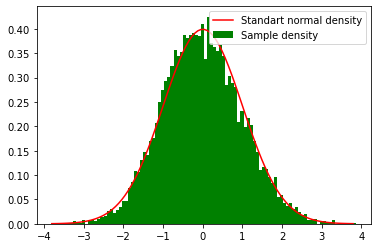

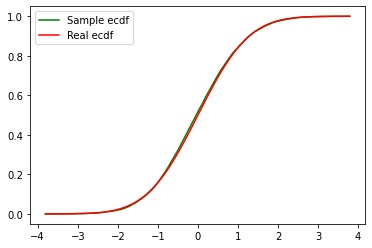

In [15]:
clt(50)

In [16]:
l1 = np.array([1,2,2,4])
l2 = np.array([5,5,7,11])


In [17]:
def light2 (l1,l2):
    time = 0
    is_working = 1
    work_num = 0
    reserved_alive = 3
    c1 = l1.copy()
    c1[0] = 0
    while is_working:
        is_working = 0
        time_lived1 = random.expovariate(l2[work_num])
        
        arr = np.nonzero(c1)[0] 
        for i in np.nonzero(c1)[0]: #comb by the alive reserves
            reserved_time1 = random.expovariate(c1[i])
            if reserved_time1 <= time_lived1:
                c1[i] = 0
                reserved_alive-=1
        time+= time_lived1
        if reserved_alive>0:
            reserved_alive-=1
            work_num = np.min(np.nonzero(c1)[0])
            c1[work_num] = 0
            is_working = 1
    return time


In [18]:
light2(l1,l2)

0.4332479645150196

In [19]:
temp = list(permutations(l1)) #all possible options

temp1 = list(permutations(l2))



In [20]:
def draw_ecdf(num, x = None, real_ecdf=None):
    if id(x) == id(None):  # None check
      x = np.linspace(min(num), max(num), 1000)

    result_ecdf = ECDF(num)(x)
    plt.plot(x, result_ecdf, color = "green")

    if id(real_ecdf) !=id( None):
      plt.plot(x, real_ecdf, color = "red")
      plt.legend(["Sample ecdf", "Real ecdf"])
    else:
      plt.legend(["Sample ecdf"])

    plt.show()

In [21]:
def light_res_simsum(l1,l2,n = 1000):
   num = []
   for i in range(0,n):
     num.append(light2(l1,l2))
   return num



def mean(num, n = 1000):
    return sum(num)/n

def vari (num,mean,n = 10000):
    sum = 0
    for i in range (0,n):
      sum+=(num[i]-mean)**2
    return sum/n

In [33]:
def expect (i):
    num = light_res_simsum(list(temp[i]),list(temp1[i]),n=1000)
    return mean(num,n=1000)

Почему гамма-распределение?  
Я подумал, что оно похоже на него, а так же сумма показательных распределение это гамма:)

1ое место:
Комбинация c интенсивностями (4, 2, 2, 1) в резерве и (11, 5, 7, 5) в работе
Выборочное среднее: 0.5007879398899566
Выборочная дисперсия: 0.07431989527525341
Параметры  гамма-распределения похожего на это :(3.0062182736886602, 0.03019438689372842, 0.15889937284916827) 


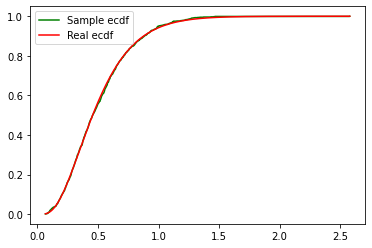

2ое место:
Комбинация c интенсивностями (4, 2, 1, 2) в резерве и (11, 5, 5, 7) в работе
Выборочное среднее: 0.4919288123557781
Выборочная дисперсия: 0.06817462668322266
Параметры  гамма-распределения похожего на это :(3.0854267979973398, 0.021820761057261214, 0.14781982036538732) 


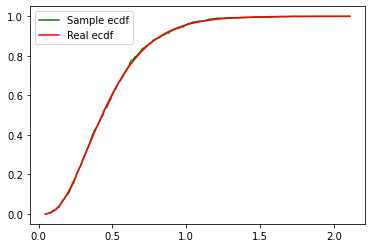

3ое место:
Комбинация c интенсивностями (2, 4, 1, 2) в резерве и (5, 11, 5, 7) в работе
Выборочное среднее: 0.4918156583399911
Выборочная дисперсия: 0.06954964804568128
Параметры  гамма-распределения похожего на это :(2.9874102115167576, 0.031010014350706223, 0.14996767097772856) 


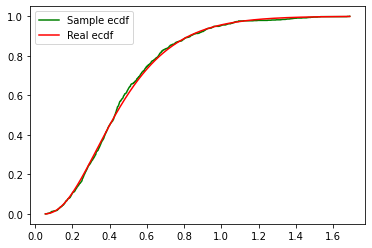

4ое место:
Комбинация c интенсивностями (2, 2, 4, 1) в резерве и (5, 7, 11, 5) в работе
Выборочное среднее: 0.48667302697025194
Выборочная дисперсия: 0.06160411640416326
Параметры  гамма-распределения похожего на это :(3.884634416330197, -0.0070771187287505515, 0.12434963698140909) 


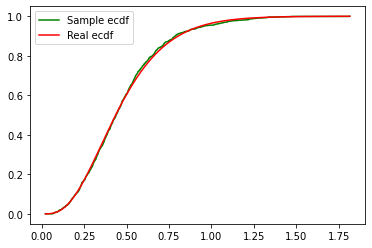

5ое место:
Комбинация c интенсивностями (4, 2, 2, 1) в резерве и (11, 7, 5, 5) в работе
Выборочное среднее: 0.485302734992698
Выборочная дисперсия: 0.06300140419689709
Параметры  гамма-распределения похожего на это :(2.9549678584504946, 0.043606935473252076, 0.14654198353598963) 


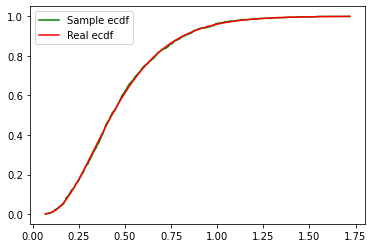

In [38]:
mas=[]
num_best = np.arange(0,24)
for i in range(0,24):
      mas.append(expect(i))
mas_with=dict(zip(mas,num_best))
res=sorted(mas_with.keys(), reverse=1)
l=1
for i in res[0:5]:
    print ('{0}ое место:'.format(l))
    l+=1
    t = mas_with[i]
    print('Комбинация c интенсивностями {0} в резерве и {1} в работе'.format(temp[t],temp1[t]))
    num = light_res_simsum(list(temp[t]),list(temp1[t]))
    x_exp = np.linspace(np.min(num),np.max(num),1000)
    k = i
    print('Выборочное среднее: {0}'.format(k))
    print ('Выборочная дисперсия: {0}'.format(vari(num,k)))
    params = ss.gamma.fit(num) 
    print('Параметры  гамма-распределения похожего на это :{0} '.format(params))
    
                        
    draw_ecdf(num,real_ecdf = ss.gamma.cdf(x_exp,*params))